In [1]:
import sys
sys.path.append('/home/l_msdetect/erik/aare/build')

# Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

# Need to use the CtbRawFile directly since
# the there is no way to know that we have a Moench05
from aare import CtbRawFile 
from aare.transform import moench05

base = Path('/mnt/sls_det_storage/matterhorn_data/aare_test_data/')

map created


## General stuff

In [2]:
with CtbRawFile(base/'Moench05/moench05_master_0.json') as f:
    print(f'{f.frames_in_file=}')
    print(f'{len(f)=}')
    print(f'{f.image_size_in_bytes=}')

f.frames_in_file=1000
len(f)=1000
f.image_size_in_bytes=512000


## Read Moench04

In [3]:
#Not implemented

## Read Moench05 
Here things get a bit more tricky since we can't identify the detector from the master file.

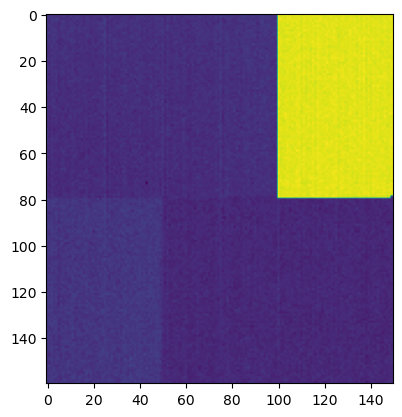

In [4]:
f = CtbRawFile(base/'Moench05/moench05_master_0.json', transform=moench05)

header, img = f.read_frame()

fig, ax = plt.subplots()
im = ax.imshow(img)

In [5]:
header, data = f.read_n(200)
print(header['frameNumber'])

[1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026
 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040
 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054
 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068
 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082
 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096
 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110
 1111 1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124
 1125 1126 1127 1128 1129 1130 1131 1132 1133 1134 1135 1136 1137 1138
 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152
 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166
 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180
 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194
 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208
 1209 

Text(0.5, 0, 'Frame index')

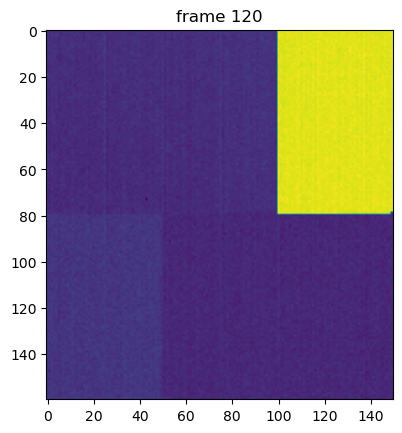

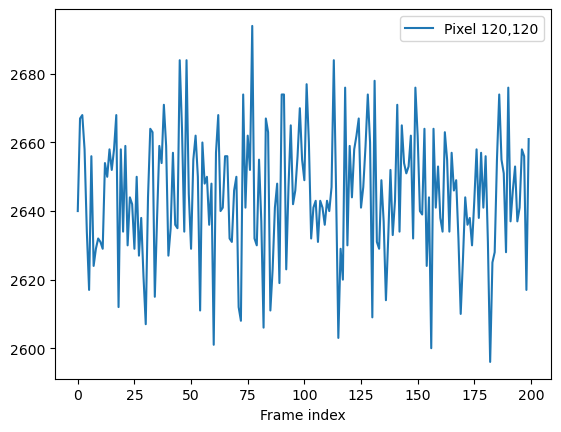

In [6]:
fig, ax = plt.subplots()
im = ax.imshow(data[120])
ax.set_title('frame 120')

fig, ax = plt.subplots()
ax.plot(data[:, 120,120], label = 'Pixel 120,120')
ax.legend()
ax.set_xlabel('Frame index')

### Read data split over muliple files

In [7]:
#10 files with 10 frammes in each
f = CtbRawFile(base/'Moench05/moench05_multifile_master_0.json', transform=moench05)
header, data = f.read_n(100)
print(f'{header.shape=}, {data.shape=}')


header.shape=(100,), data.shape=(100, 160, 150)


In [8]:
#Support for with block
with CtbRawFile(base/'Moench05/moench05_multifile_master_0.json', transform=moench05) as f:
    header, data = f.read_n(100)
    print(f'{header.shape=}, {data.shape=}')

header.shape=(100,), data.shape=(100, 160, 150)


Text(0.5, 1.0, 'sum')

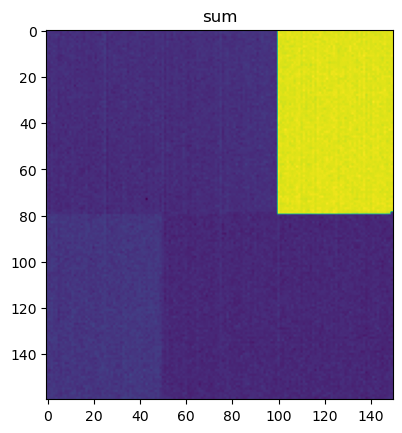

In [9]:
#Iterate over all frames
sum_image = np.zeros((160,150))
frames_summed = 0
with CtbRawFile(base/'Moench05/moench05_multifile_master_0.json', transform=moench05) as f:
    for header, image in f:
        frames_summed += 1
        sum_image = sum_image + image

fig, ax = plt.subplots()
im = ax.imshow(sum_image)
ax.set_title('sum')
        

In [10]:
#To know how many iterations are needed we can use 
f.frames_in_file

#Read 10 frames 10 times
with CtbRawFile(base/'Moench05/moench05_multifile_master_0.json', transform=moench05) as f:
    for i in range(10):
        header, data = f.read_n(10)
        print(header['frameNumber'])

[101 102 103 104 105 106 107 108 109 110]
[111 112 113 114 115 116 117 118 119 120]
[121 122 123 124 125 126 127 128 129 130]
[131 132 133 134 135 136 137 138 139 140]
[141 142 143 144 145 146 147 148 149 150]
[151 152 153 154 155 156 157 158 159 160]
[161 162 163 164 165 166 167 168 169 170]
[171 172 173 174 175 176 177 178 179 180]
[181 182 183 184 185 186 187 188 189 190]
[191 192 193 194 195 196 197 198 199 200]
